In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
car_data = pd.read_csv(r"C:\Users\Pratikk\OneDrive\Desktop\CarPred\CAR DETAILS FROM CAR DEKHO.csv")

In [26]:
car_data.head(4340)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,0,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,0,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,0,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,0,First Owner


In [6]:
car_data.shape

(4340, 8)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [10]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [12]:
print(car_data.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [13]:
print(car_data.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [48]:
car_data.replace({'fuel':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':4, 'Electric':5}}, inplace = True)

car_data.replace({'seller_type':{'Individual':0, 'Dealer':1}}, inplace = True)

car_data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

car_data.replace({'owner':{'First Owner':0, 'Second Owner':1,'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)

In [49]:
car_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1
5,Maruti Alto LX BSIII,2007,140000,125000,0,0,0,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,0,0,0,0
7,Tata Indigo Grand Petrol,2014,240000,60000,0,0,0,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,0,0,0,0
9,Maruti Celerio Green VXI,2017,365000,78000,2,0,0,0


In [50]:
X = car_data.drop(['name', 'seller_type', 'selling_price'], axis = 1)
Y = car_data['selling_price']

In [51]:
print(X)

      year  km_driven  fuel  transmission  owner
0     2007      70000     0             0      0
1     2007      50000     0             0      0
2     2012     100000     1             0      0
3     2017      46000     0             0      0
4     2014     141000     1             0      1
...    ...        ...   ...           ...    ...
4335  2014      80000     1             0      1
4336  2014      80000     1             0      1
4337  2009      83000     0             0      1
4338  2016      90000     1             0      0
4339  2016      40000     0             0      0

[4340 rows x 5 columns]


In [52]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.10, random_state = 2)

In [54]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [57]:
train_pred = lin_reg.predict(X_train)

In [58]:
error_score = metrics.r2_score(Y_train, train_pred)

In [59]:
print(error_score)

0.421918591977699


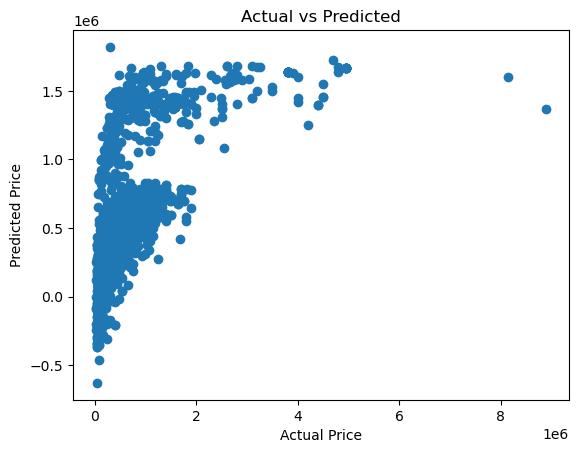

In [60]:
plt.scatter(Y_train, train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted")
plt.show()

In [61]:
test_pre = lin_reg.predict(X_test)

In [63]:
error_score = metrics.r2_score(Y_test, test_pre)

In [64]:
print(error_score)

0.49927147219842216


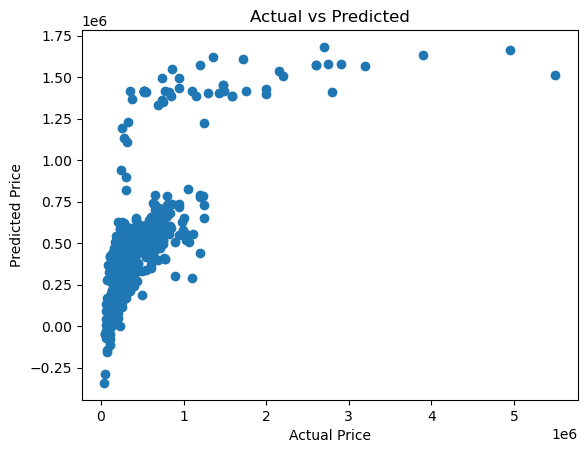

In [65]:
plt.scatter(Y_test, test_pre)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted")
plt.show()

0.4219185919304371


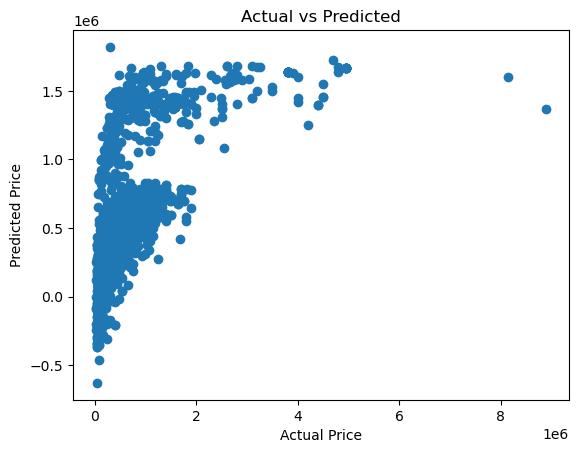

0.4992707758512006


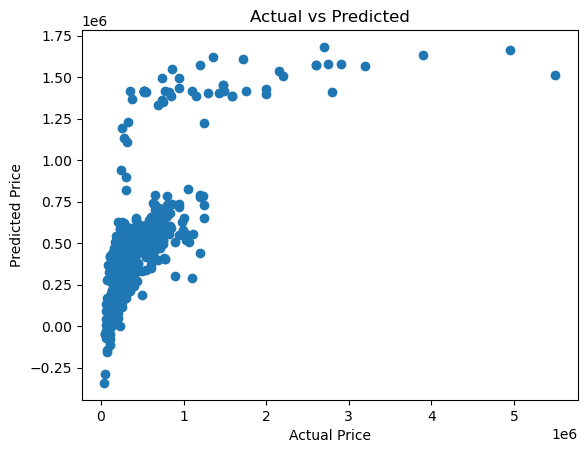

In [66]:
lasso_reg = Lasso()

lasso_reg.fit(X_train,Y_train)

train_pred = lasso_reg.predict(X_train)

error_score = metrics.r2_score(Y_train, train_pred)

print(error_score)

plt.scatter(Y_train, train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted")
plt.show()

test_pre = lasso_reg.predict(X_test)

error_score = metrics.r2_score(Y_test, test_pre)

print(error_score)

plt.scatter(Y_test, test_pre)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
#the value is low as I had dropped a column named seller_type